Exercice initialement proposé par Élodie Puybareau, remis en forme par Guillaume Tochon

In [1]:
### Importing libraires ###
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline

# Relation entre l'intercorrélation et la convolution

Dans le cours, vous avez vu la relation suivante entre la fonction d'intercorrélation et le produit de convolution : pour deux signaux $x, y \in \mathcal{L}^2(\mathbb{R}) \cap \mathcal{L}^1(\mathbb{R})$,
$$\Gamma_{xy} = \left(x \ast \overline{y^-} \right)$$
Avec :
1. l'appartenance à $\mathcal{L}^2(\mathbb{R})$ est nécessaire pour garantir l'existence de l'intercorrélation
2. l'appartenance à $\mathcal{L}^1(\mathbb{R})$ est nécessaire pour garantir l'existance du produit de convolution
3. $y^-$ est la fonction dont le graphe est le symétrique de celui de $y$ par rapport à l'axe des ordonnées : $y^-(t) = y(-t)$ (donc $y^-(-1) = y(1)$, $y^-(-5) = y(5)$, etc). À noter directement que is $y$ est une fonction paire ($y(-t) = y(t)$), alors $y ^- = y$
4. $\overline{y}$ désigne le complexe conjugué de $y$. Évidemment, si $y$ est une fonction à valeurs réelles ($y(t) \in \mathbb{R} \ \forall t$), alors $\overline{y} = y$.

<i><u> Remarque :</u> les signaux numériques sont représentés sous formes de vecteurs discrets et finis $x = \left[x[0], x[1], \dots x[N-1] \right]$. Pour eux, la question d'appartenance à $\mathcal{L}^1(\mathbb{R})$ et $\mathcal{L}^2(\mathbb{R})$ ne se pose pas, puisque les quantités $\displaystyle \sum_{i=0}^{N-1} \vert x[i] \vert$ et $\displaystyle \sum_{i=0}^{N-1} \vert x[i] \vert^2$ sont naturellement finies. En partique, on peut donc toujours calculer une auto/inter-corrélation ou le produit de convolution de deux signaux.</i>

#### En résumé, si :
1. on prend un signal $y$
2. on le symétrise par rapport à l'axe des ordonnées : $y \rightarrow y^-$
3. on en prend ensuite le complexe conjugué : $y^- \rightarrow \overline{y^-}$
4. on en calcule le produit de convolution avec un signal x : $\left( x \ast \overline{y^-}\right)$

Alors on doit obtenir le résultat de l'intercorrélation $\Gamma_{xy}$ entre $x$ et $y$ 

### L'objectif de cet exercice est de vous permettre de vérifier en pratique cette relation !

In [16]:
# 🛑 define a discrete time vector
tmin = 0 # min time (in second)
tmax = 15 # max time (in second)
fe = 250 # sampling frequency (number of points per second)
Te = 1/fe # sampling period (time between two consecutive points)
t = np.arange(tmin,tmax,Te) # time vector between tmin and tmax with time step Te

Pour en savoir plus : [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) ($\leftarrow$ oui, c'est cliquable, et ça ouvre la doc de la fonction `np.arange`)

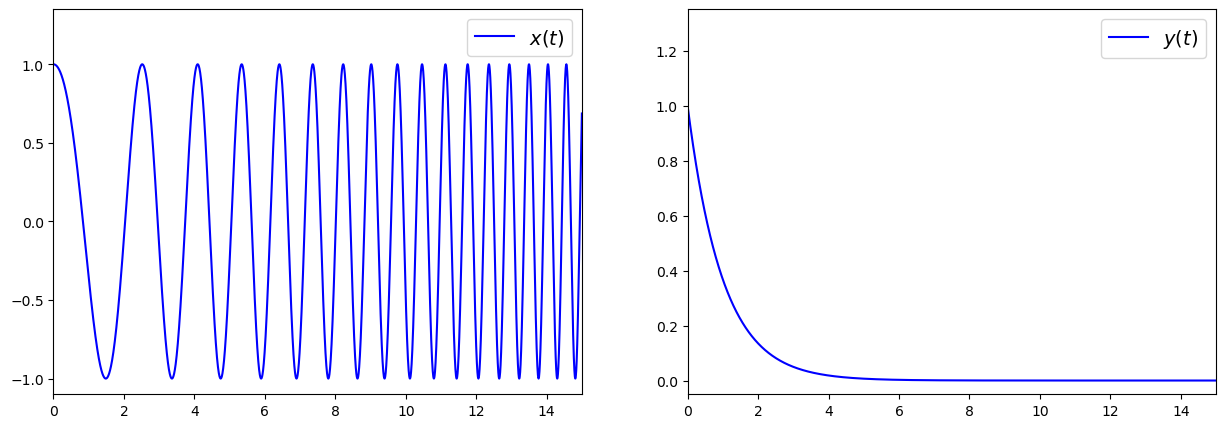

In [17]:
# 🛑 define two signals
x = sp.signal.chirp(t, 0.25, t.max(), 2) # chirp chirp
y = np.exp(-t) # decreasing exponential

# plot the two signals x and y
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,x,'b',label=r'$x(t)$')
plt.xlim(t.min(),t.max())
plt.ylim(ymax=1.35)
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(t,y,'b',label=r'$y(t)$')
plt.xlim(t.min(),t.max())
plt.ylim(ymax=1.35)
plt.legend(loc='upper right',fontsize=14)
plt.show()

### 🛠️ 🚧 👷  À vous de jouer !

Calculez dans un premier temps, puis affichez l'intercorrélation $\Gamma_{xy}$ entre les deux signaux $x$ et $y$, grâce à la fonction [`sp.signal.correlate`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html) (vous pouvez laisser les paramètres <i>mode</i> et <i> method </i> à leurs valeurs par défaut)

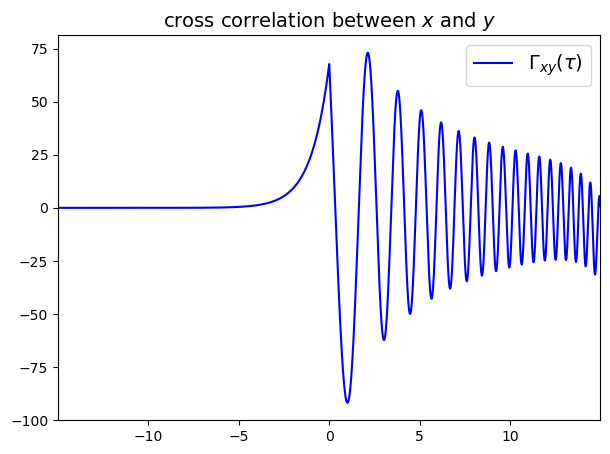

In [18]:
t_corr = np.arange(-tmax+Te,tmax,Te)
G_xy = sp.signal.correlate(x, y) # FIXME

# plot the result
plt.figure(figsize=(7,5))
plt.plot(t_corr,G_xy,'b',label=r'$\Gamma_{xy}(\tau)$')
plt.title(r'cross correlation between $x$ and $y$',fontsize=14)
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='best',fontsize=14)
plt.show()

### 🛠️ 🚧 👷  À vous de jouer !

Calculez dans un second temps, puis affichez le produit de convolution $x \ast y$ entre les deux signaux $x$ et $y$, grâce à la fonction [`sp.signal.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) (idem que pour la question précédente, vous pouvez laisser les paramètres <i>mode</i> et <i> method </i> à leurs valeurs par défaut).

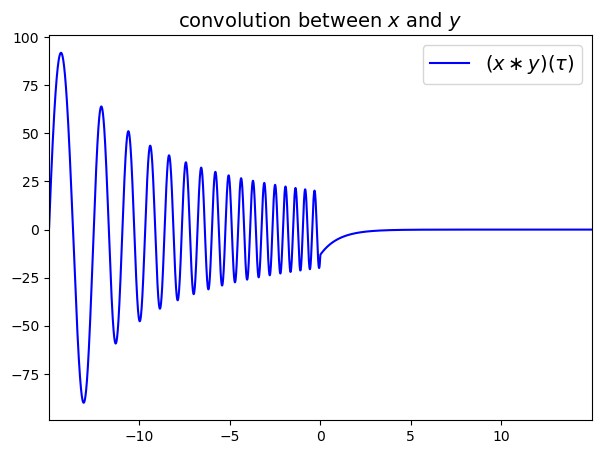

In [19]:
Conv_xy = sp.signal.convolve(x, y)
# plot the result
plt.figure(figsize=(7,5))
plt.plot(t_corr,Conv_xy,'b',label=r'$(x \ast y)(\tau)$')
plt.title(r'convolution between $x$ and $y$',fontsize=14)
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='best',fontsize=14)
plt.show()

### 🛠️ 🚧 👷  À vous de jouer !

...et enfin : retrouvez la relation entre corrélation et convolution !

Indice 1 : vous pouvez regarder la documentation de [`np.flip`](https://numpy.org/doc/stable/reference/generated/numpy.flip.html) ou l'effet de `a[::-1]` pour un array `a` donné <br>
Indice 2 : A-t-on vraiment besoin du complexe conjugué sur $y$ dans ce cas ?

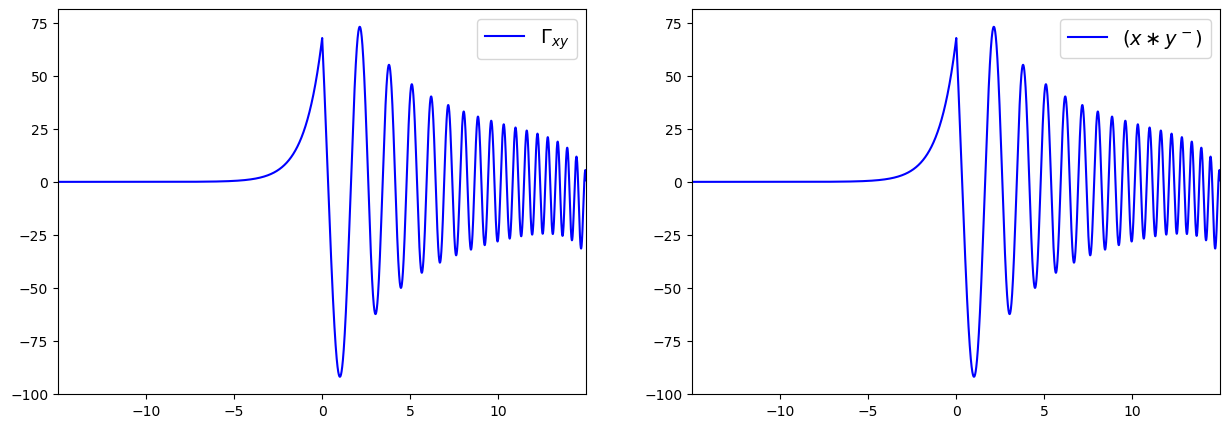

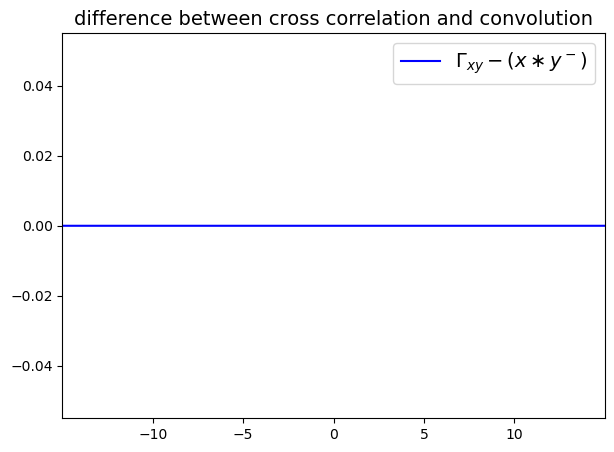

In [23]:
G_xy = sp.signal.correlate(x, y) # FIXME
conv_xy_minus = sp.signal.convolve(x, np.flip(y)) # FIXME

# plot the result
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t_corr,G_xy,'b',label=r'$\Gamma_{xy}$')
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(t_corr,conv_xy_minus,'b',label=r'$(x \ast y^-)$')
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='upper right',fontsize=14)
plt.show()
# plot the difference
plt.figure(figsize=(7,5))
plt.plot(t_corr,G_xy-conv_xy_minus,'b',label=r'$\Gamma_{xy}-(x \ast y^-)$')
plt.title('difference between cross correlation and convolution',fontsize=14)
plt.xlim(t_corr.min(),t_corr.max())
plt.legend(loc='upper right',fontsize=14)
plt.show()

# Bravo !
L'échauffement est fini, vous pouvez maintenant passer au second exercice : [localisation de l'origine d'un séisme par intercorrélation](TP1_correlation_convolution_exo2.ipynb).